In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from use_case.baseline import * 
from tests.eval import *

np.random.seed(1337)
torch.manual_seed(1337)

N = 10
payoff_i = np.random.uniform(-10, 10, (N, N))
payoff_j = np.random.uniform(-10, 10, (N, N))

# Initialize environment
N_ACTIONS = payoff_i.shape[0]
N_AGENTS = 500
env = BaselineEnvironment(N_AGENTS, payoff_i, payoff_j, total_games = 1)

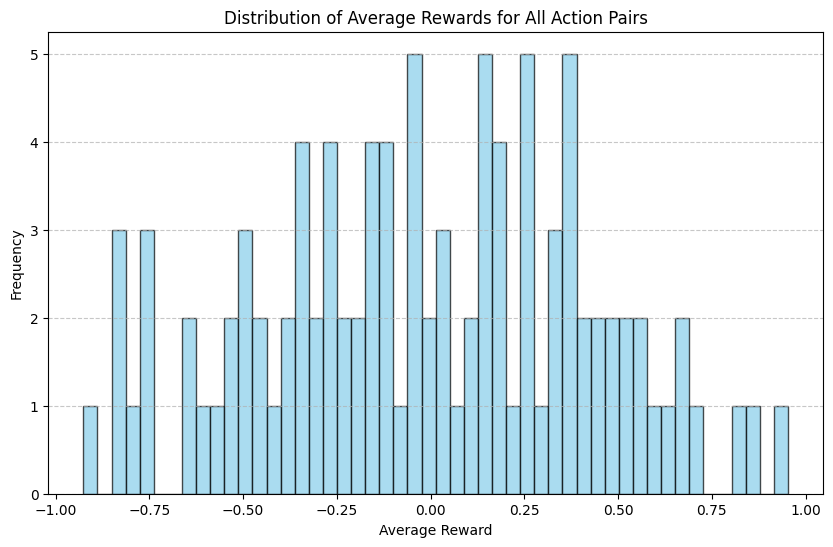

In [35]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import matplotlib.pyplot as plt

# Calculate average rewards for all action pairs
average_rewards = (payoff_i + payoff_j) / 2

# Flatten the matrix into a list of all possible rewards
all_rewards = average_rewards.ravel()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(all_rewards, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Rewards for All Action Pairs')
plt.xlabel('Average Reward')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Actual Run

In [36]:
from models.model import *
from models.trainer import *

In [37]:
# Configure the network here
parameters = ParameterSettings(
    n_agents = N_AGENTS,
    d_action = N_ACTIONS, 
    d_obs = env.obs_size, 
    d_traits = 1,
    d_beliefs = 1,
    d_het_latent = 4
)
parameters.device = "cuda" if torch.cuda.is_available() else "cpu"

model = Model(parameters)

In [38]:
equilibriua = find_pure_equilibria(payoff_i, payoff_j)

for eq in equilibriua:
    x, y = eq 
    a = (y[0] + y[1]) / 2

    print(x, a)

(4, 9) 0.8729602221265065
(5, 3) 0.952948118219827


In [39]:
evaluate_policy(model, env, 10)

np.float64(-0.05573725618506044)

In [40]:
# Setup the training loop
training_parameters = TrainingParameters(
    outer_loops = 1_000,
    
    actor_learning_rate= 1e-4,
    critic_learning_rate = 1e-4,
    hypernet_learning_rate = 1e-4,

    hypernet_jsd_threshold = 0.25,

    sampled_agents_proportion = 1.0,
    experience_sampling_steps = 5,
    experience_buffer_size = 25,

    entropy_coeff = 0.2,

    epsilon_period = 200,
    
    should_train_hypernet = True,
    verbose = True
)


train_model(model, env, training_parameters)
        

 84%|████████▎ | 837/1000 [11:36<02:12,  1.23it/s]Exception in thread Thread-36:
Traceback (most recent call last):
  File "c:\Users\Joaquin\miniconda3\envs\thesis2\Lib\threading.py", line 1075, in _bootstrap_inner
Exception in thread Thread-40:
Traceback (most recent call last):
  File "c:\Users\Joaquin\miniconda3\envs\thesis2\Lib\threading.py", line 1075, in _bootstrap_inner
Exception in thread Thread-38:
Traceback (most recent call last):
  File "c:\Users\Joaquin\miniconda3\envs\thesis2\Lib\threading.py", line 1075, in _bootstrap_inner
Exception in thread Thread-37:
Traceback (most recent call last):
  File "c:\Users\Joaquin\miniconda3\envs\thesis2\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "c:\Users\Joaquin\miniconda3\envs\thesis2\Lib\site-packages\tensorboard\summary\writer\event_file_writer.py", line 244, in run
    self._run()
  File "c:\Users\Joaquin\miniconda3\envs\thesis2\Lib\site-packages\tensorboard\summary\writer\event_file_writer.py", line 275

FileNotFoundError: [Errno 2] No such file or directory: b'runs\\May12_14-42-56_LAPTOP-88AV9U3J\\events.out.tfevents.1747032176.LAPTOP-88AV9U3J.14524.24'

    self.fs.append(self.filename, file_content, self.binary_mode)
  File "c:\Users\Joaquin\miniconda3\envs\thesis2\Lib\site-packages\tensorboard\compat\tensorflow_stub\io\gfile.py", line 167, in append
    self._write(filename, file_content, "ab" if binary_mode else "a")
  File "c:\Users\Joaquin\miniconda3\envs\thesis2\Lib\site-packages\tensorboard\compat\tensorflow_stub\io\gfile.py", line 171, in _write
    with io.open(filename, mode, encoding=encoding) as f:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: b'runs\\May12_14-42-56_LAPTOP-88AV9U3J\\events.out.tfevents.1747032176.LAPTOP-88AV9U3J.14524.24'


# Heterogeneous Baseline

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from use_case.baseline import * 
from tests.eval import *
from models.model import *
from models.trainer import *


In [ ]:
np.random.seed(1337)
torch.manual_seed(1337)

N_AGENTS = 2000 
N_TYPES = 10
N_ACTIONS = 10
type_payoffs = np.random.uniform(-10, 10, (N_TYPES, N_TYPES, 2, N_ACTIONS, N_ACTIONS))
env = BaselineHeterogeneous(N_AGENTS, N_TYPES, type_payoffs)

In [ ]:
# Configure the network here
parameters = ParameterSettings(
    n_agents = N_AGENTS,
    d_action = N_ACTIONS, 
    d_obs = env.obs_size, 
    d_traits = N_TYPES,
    d_beliefs = 1
    
)
parameters.device = "cuda" if torch.cuda.is_available() else "cpu"

model = Model(parameters)

In [ ]:
# Setup the training loop
training_parameters = TrainingParameters(
    outer_loops = 100,

    actor_learning_rate= 2.5e-4,
    critic_learning_rate = 1e-3,
    hypernet_learning_rate = 2.5e-4,

    hypernet_jsd_threshold = 0.25,

    sampled_agents = N_AGENTS // 4,
    experience_buffer_size = 10,

)


In [ ]:

train_model(model, env, training_parameters)